In [ ]:
import shutil
import os
import numpy as np
import fnmatch

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls '/content/drive/MyDrive/mask/maskspolygons' 

mp_48106_138056.png  mp_50410_143432.png  mp_51434_144712.png
mp_48106_138312.png  mp_50410_143688.png  mp_51434_144968.png
mp_48106_138824.png  mp_50410_144200.png  mp_51434_145224.png
mp_48362_138056.png  mp_50410_144712.png  mp_51434_145480.png
mp_48362_138312.png  mp_50410_144968.png  mp_51434_145736.png
mp_48362_138568.png  mp_50410_145224.png  mp_51434_145992.png
mp_48362_138824.png  mp_50410_145480.png  mp_51690_144200.png
mp_48362_139080.png  mp_50666_143176.png  mp_51690_144456.png
mp_48618_138568.png  mp_50666_143432.png  mp_51690_145480.png
mp_48618_138824.png  mp_50666_143688.png  mp_51690_145736.png
mp_49642_141896.png  mp_50666_144200.png  mp_51946_143176.png
mp_49642_143688.png  mp_50666_144456.png  mp_51946_143432.png
mp_49642_143944.png  mp_50666_144712.png  mp_51946_143944.png
mp_49642_144200.png  mp_50666_144968.png  mp_51946_144200.png
mp_49898_141896.png  mp_50666_145224.png  mp_51946_144456.png
mp_49898_142920.png  mp_50666_145480.png  mp_51946_145224.png
mp_49898

In [ ]:
threshold=15
labelledimgs=[]

In [ ]:
def labelling(mask, threshold):
  count=0
  for i in mask:
    for j in i:
      if j==255:
        count+=1
  size=1
  for i in mask.shape:
    size=size*i

  if (count/size)*100>threshold:
    label='cancerous'
  else:
    label='non-cancerous'

  labelledmask=np.array([mask,label,((count/size)*100),threshold])
  return labelledmask

In [ ]:
import imageio
import glob
import matplotlib.pyplot as plt

In [ ]:
c_path='/content/cancerous/'
n_path='/content/noncancerous/'

In [ ]:
os.makedirs(c_path,exist_ok=True)
os.makedirs(n_path,exist_ok=True)

In [ ]:
im=[]

for im_path in glob.glob("/content/drive/MyDrive/mask/maskspolygons/*.png"):
  im1=imageio.imread(im_path)
  im.append(im1)
  img=labelling(np.array(im1),threshold)
  if img[1]=='cancerous':
    shutil.copy(im_path,c_path)
  else:
    shutil.copy(im_path,n_path)
  labelledimgs.append(img)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  app.launch_new_instance()


In [ ]:
print(len(fnmatch.filter(os.listdir(c_path), '*.png')))
print(len(fnmatch.filter(os.listdir(n_path), '*.png')))

71
43


In [ ]:
len(im)

114

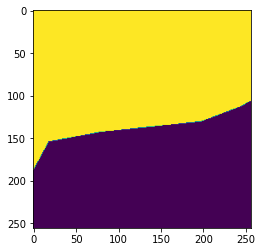

In [ ]:
plt.imshow(im[10])

In [ ]:
print(im[0])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


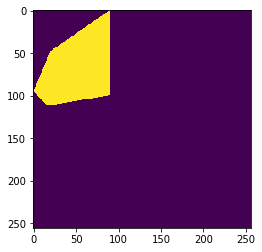

non-cancerous


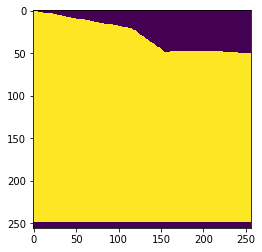

cancerous


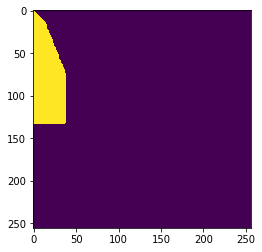

non-cancerous


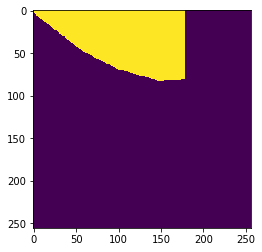

cancerous


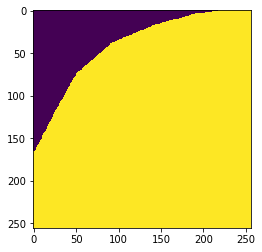

cancerous


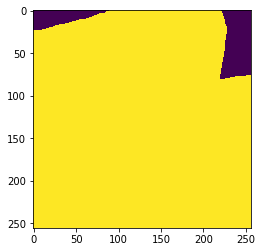

cancerous


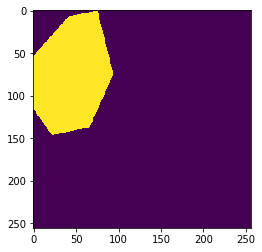

cancerous


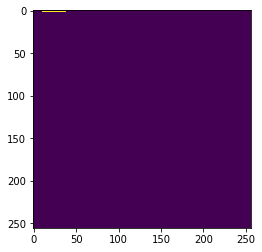

non-cancerous


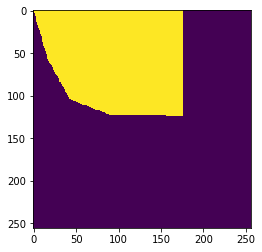

cancerous


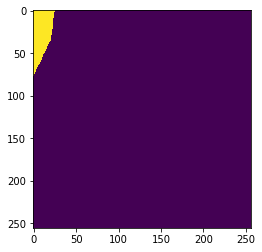

non-cancerous


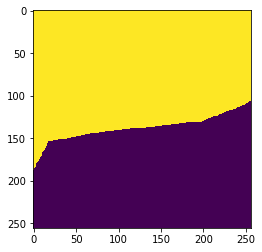

cancerous


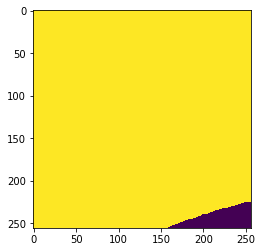

cancerous


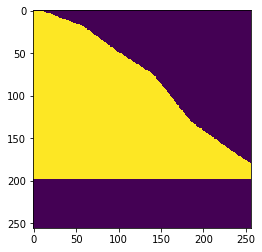

cancerous


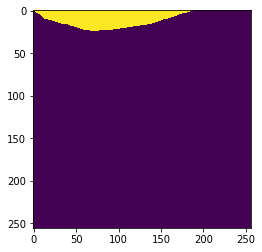

non-cancerous


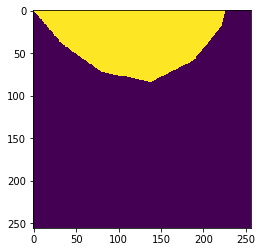

cancerous


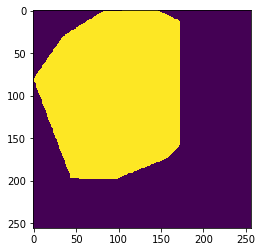

cancerous


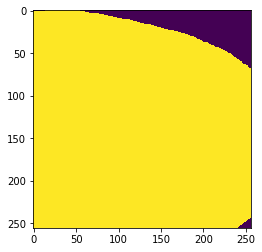

cancerous


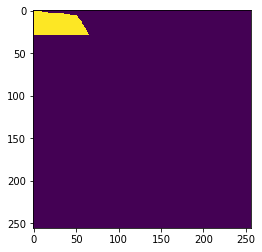

non-cancerous


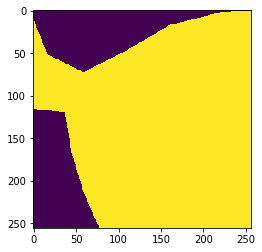

cancerous


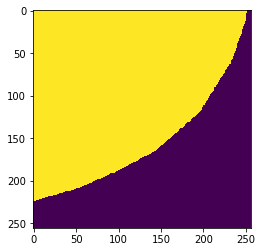

cancerous


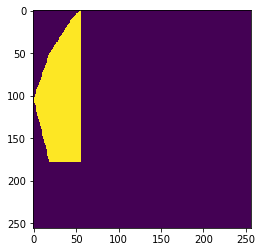

non-cancerous


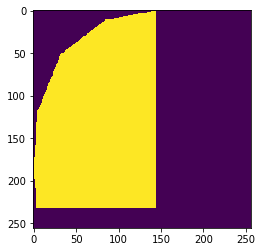

cancerous


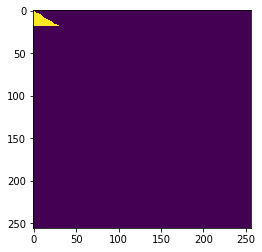

non-cancerous


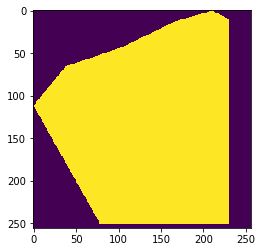

cancerous


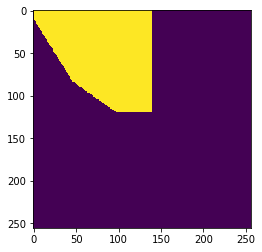

cancerous


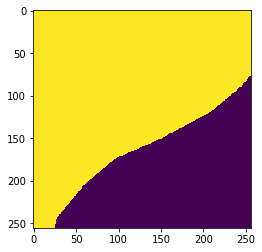

cancerous


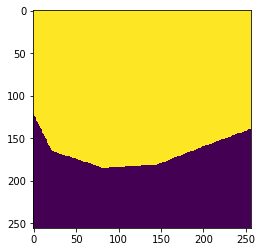

cancerous


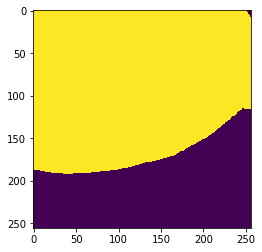

cancerous


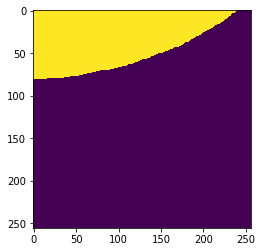

cancerous


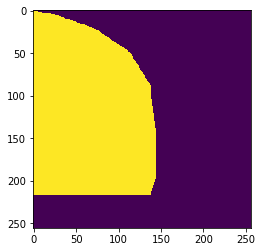

cancerous


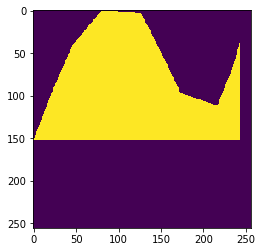

cancerous


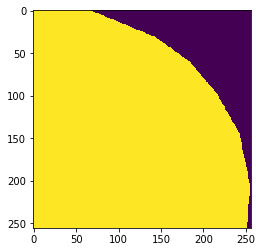

cancerous


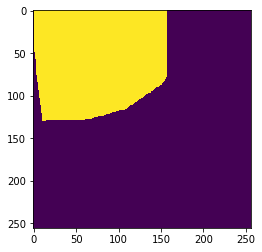

cancerous


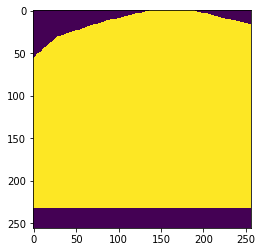

cancerous


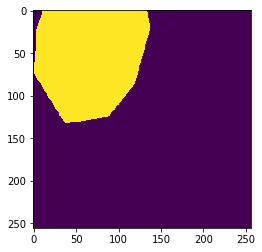

cancerous


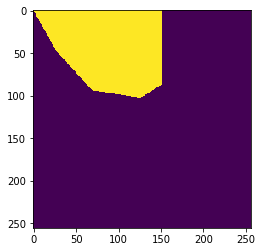

cancerous


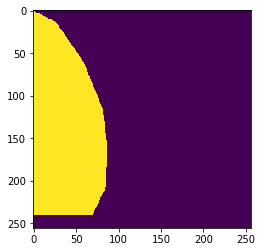

cancerous


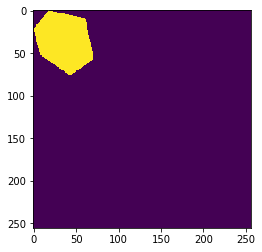

non-cancerous


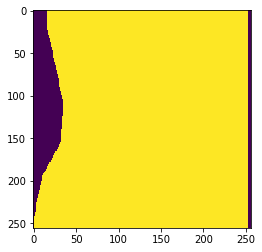

cancerous


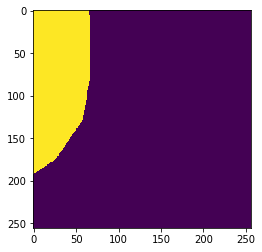

cancerous


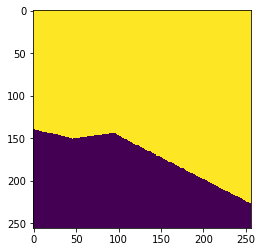

cancerous


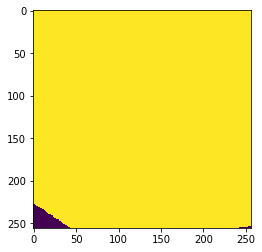

cancerous


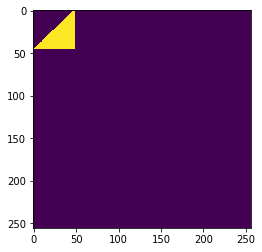

non-cancerous


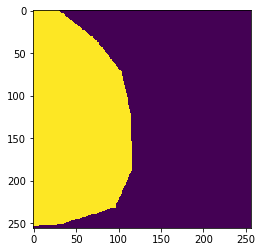

cancerous


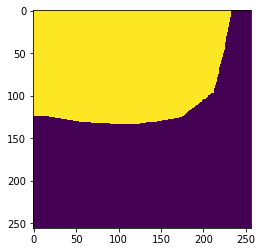

cancerous


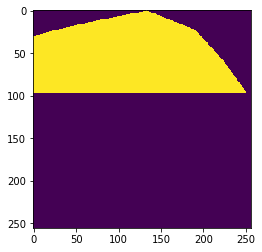

cancerous


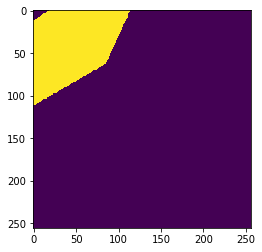

non-cancerous


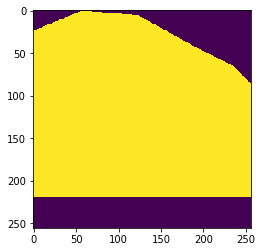

cancerous


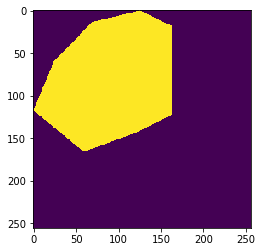

cancerous


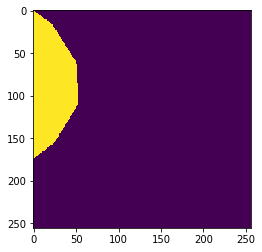

non-cancerous


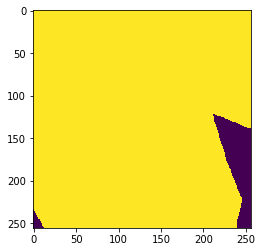

cancerous


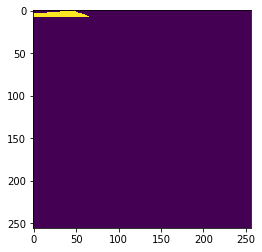

non-cancerous


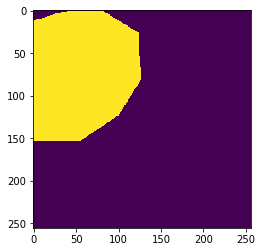

cancerous


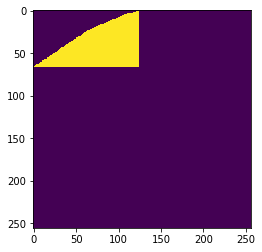

non-cancerous


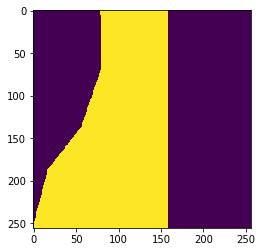

cancerous


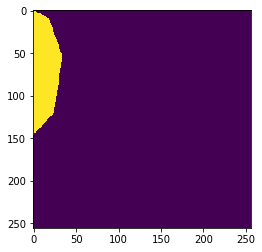

non-cancerous


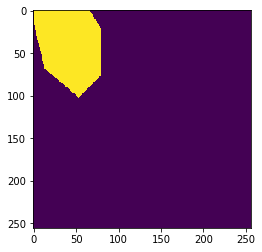

non-cancerous


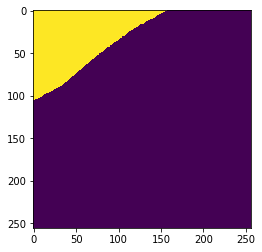

non-cancerous


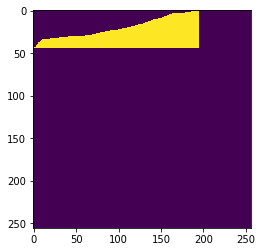

non-cancerous


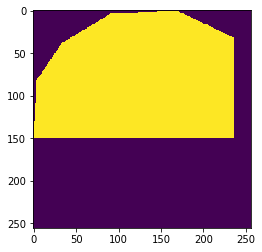

cancerous


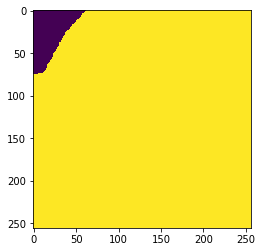

cancerous


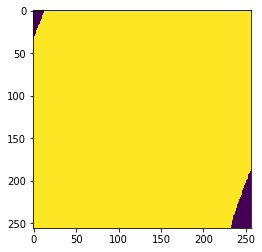

cancerous


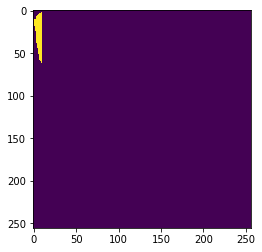

non-cancerous


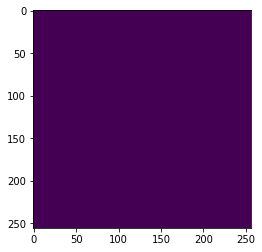

non-cancerous


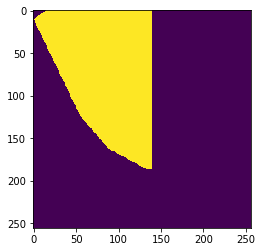

cancerous


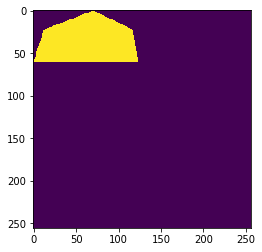

non-cancerous


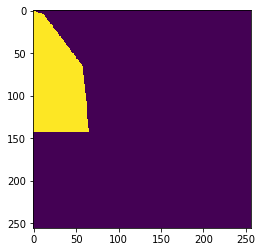

non-cancerous


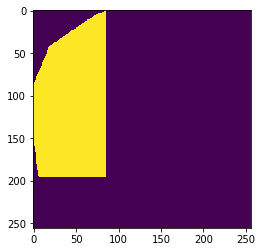

cancerous


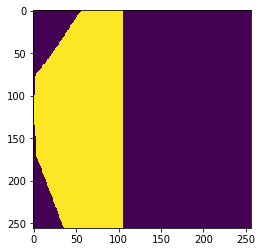

cancerous


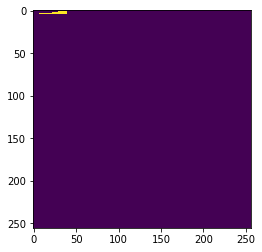

non-cancerous


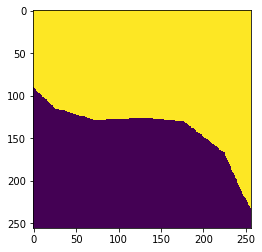

cancerous


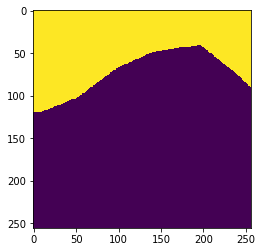

cancerous


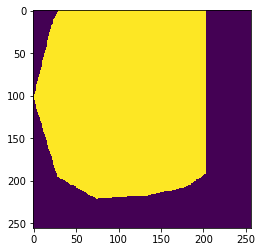

cancerous


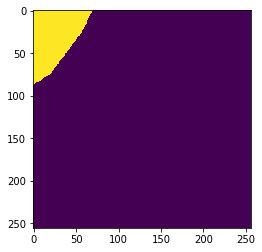

non-cancerous


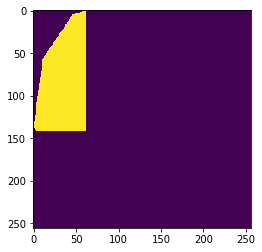

non-cancerous


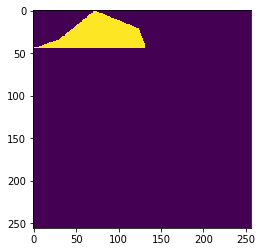

non-cancerous


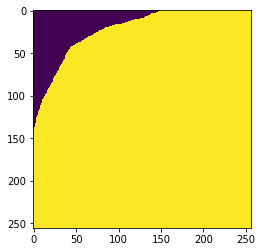

cancerous


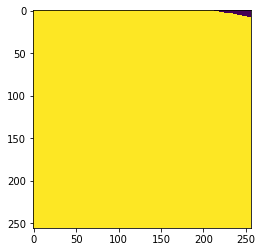

cancerous


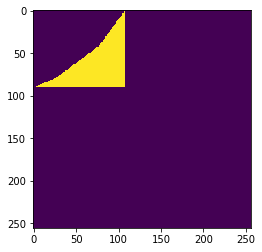

non-cancerous


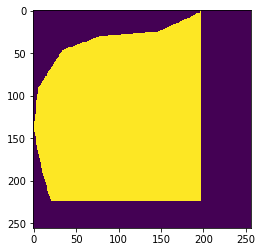

cancerous


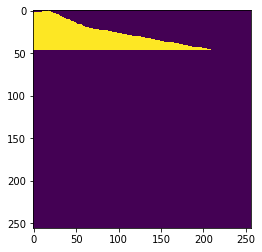

non-cancerous


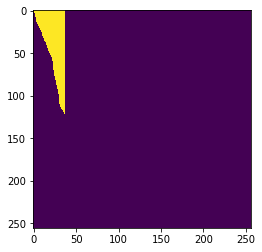

non-cancerous


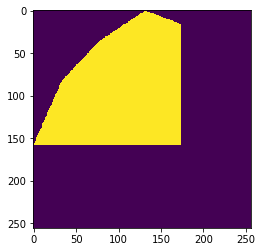

cancerous


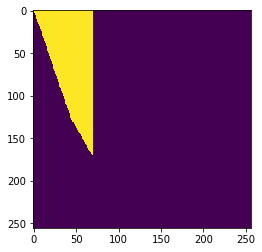

non-cancerous


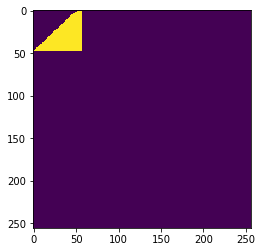

non-cancerous


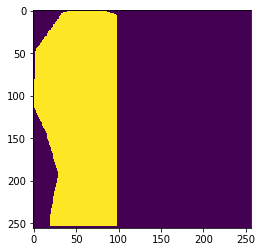

cancerous


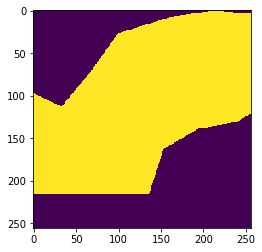

cancerous


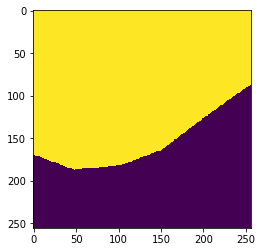

cancerous


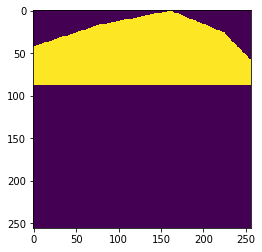

cancerous


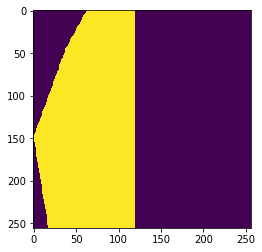

cancerous


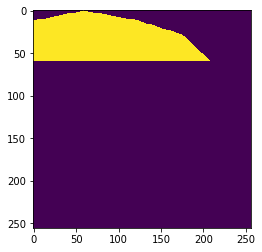

non-cancerous


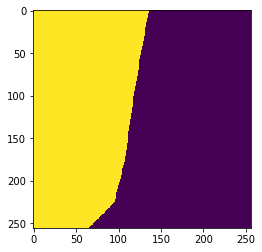

cancerous


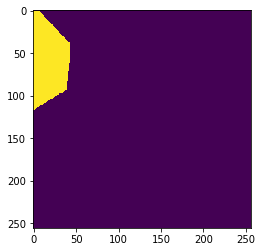

non-cancerous


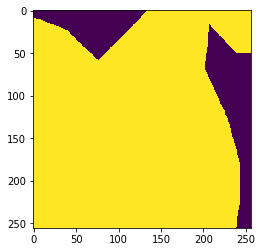

cancerous


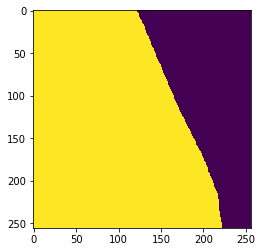

cancerous


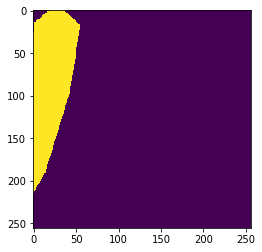

non-cancerous


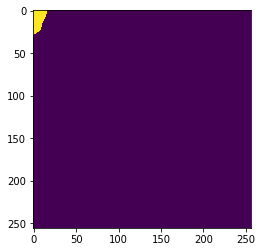

non-cancerous


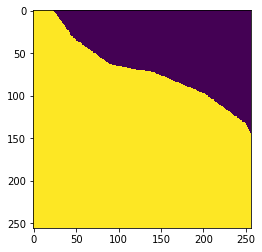

cancerous


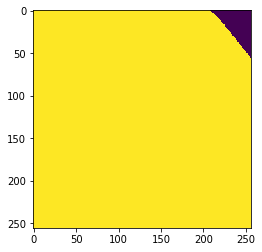

cancerous


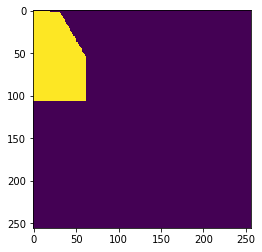

non-cancerous


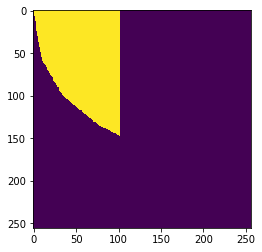

cancerous


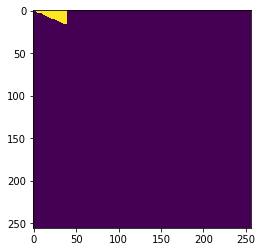

non-cancerous


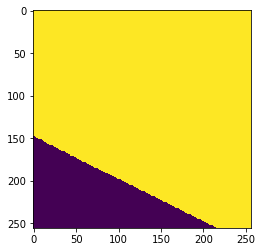

cancerous


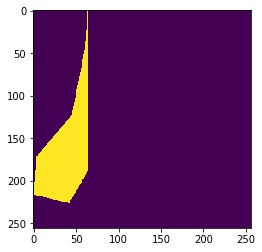

non-cancerous


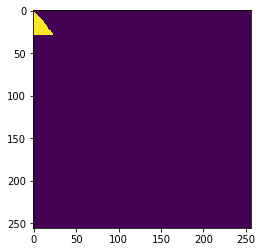

non-cancerous


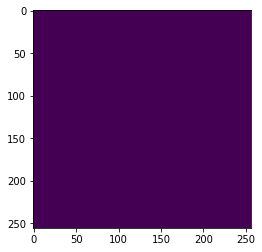

cancerous


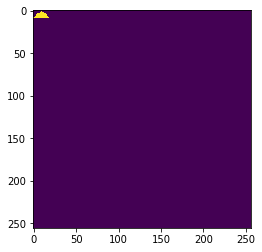

non-cancerous


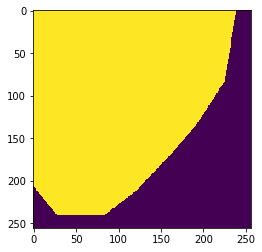

cancerous


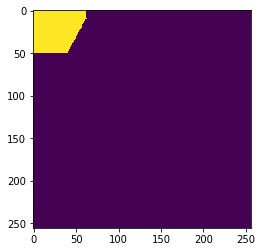

non-cancerous


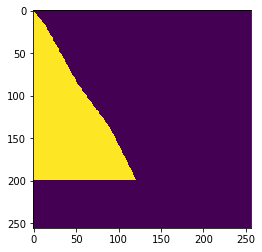

cancerous


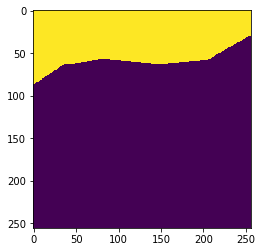

cancerous


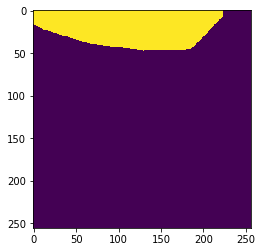

non-cancerous


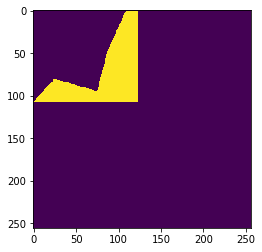

non-cancerous


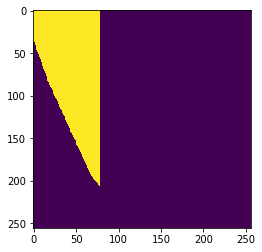

cancerous


In [ ]:
for i in labelledimgs:
  plt.imshow(i[0], interpolation='nearest')
  plt.show()
  print(i[1])